<a href="https://colab.research.google.com/github/lurahayes/programming/blob/main/Group4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project One: GSS Research
Data Cleaning, Analysis, and Visualizations using selected variables from the General Social Survey

Authors: Nicole Blaustein, Lura Hayes, Jacqueline Chao, Ann Li, and Madelyn Khoury.

## Questions



*   Did the overall confidence level in American health institutions change after the pandemic?
*   Is there a difference in health institution confidence levels over time according to political party affiliation?
*   Is there a difference in health institution confidence levels over time according to age groups?



These questions will be answered via comparison of the data found in the general social surveys from 2018 and 2021

## Data Sets and Variables

All of the data used was received from the General Social Survey's [website](https://gss.norc.org/). This is a survey of randomly selected Americans that is conducted every even year, 2021 was published later due to the pandemic. We chose to examine data from the earliest availible year prior to the pandemic (2018) and the year directly following the pandemic (2021). We wanted to ensure the proximity in years to see the pandemic's direct effect on American attitudes.

Variables used include year, degree (level of education), race, sex, age, region, partyid (political affiliation), and conmedic (the level of confidence in American health institutions).

**Variable Keys According to the GSS Codebook**

Partyid:

0 = Strong Democrat

1 = Not Very Strong Democrat

2 = Independent, Close to Democrat

3 = Independent (Neither; No Response)

4 = Independent, Close to Republican

5 = Not Very Strong Republican

6 = Strong Republican

7 = Other Party

Conmedic

What is your level of confidence in the people running American medical institutions?

1 = A Great Deal

2 = Only Some

3 = Hardly Any

Degree:

1 = Less Than High School

2 = High School

3 = Associate/Junior College

4 = Bachelors

5 = Graduate

Race:

1 = White

2 = Black

3 = Other

Sex:

1 = Male

2 = Female

Region

1 = New England

2 = Middle Atlantic

3 = East North Central

4 = West North Central

5 = South Atlantic

6 = East South Central

7 = West South Central

8 = Mountain

9 = Pacific






## Overall Findings

Overall, there was a slight increase in the amount of confidence in American medical instituions from 2018-2021 (after the COVID-19 pandemic).

Age: Younger people (aged 18-24) showed less confidence in these institutions following the pandemic. People aged 25-44 remained about the same. People aged 45-64 showed a slight increase in their confidence levels over time. Older individuals, aged 65+, showed a significant increase in their trust levels regarding medical institutions. Additionally, more younger individuals answered the survey in 2018, and more older individuals answered the survey in 2021. This is a potential contributing factor to the overall increase in confidence after the pandemic.

Political Party: From 2018-2021, left leaning individuals increased their confidence levels, especially strong Democrats. Right leaning individuals remained about the same.

## Importing Data and Necessary Packages

In [1]:
!git clone https://github.com/jacqueline-chao/project-1.git

Cloning into 'project-1'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 65 (delta 28), reused 39 (delta 9), pack-reused 0
Receiving objects: 100% (65/65), 1.53 MiB | 9.69 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./project-1/data/2018_v_2021_data.csv")

## Data Analysis

#### Preliminary Data Analysis Preparation

Before we begin, lets look at the overall shape of the dataset

In [7]:
print("Shape of data:", df.shape, "\n")
print("Number of 2018 Entries:\n", df[df['year']==2018].count(), "\n")
print("Number of 2021 Entries:\n", df[df['year']==2021].count(), "\n")

Shape of data: (4272, 9) 

Number of 2018 Entries:
 conmedic    1412
partyid     2104
region      2136
id          2136
age         2132
sex         2136
race        2136
degree      2136
year        2136
dtype: int64 

Number of 2021 Entries:
 conmedic    1404
partyid     2115
region      2136
id          2136
age         1955
sex         2085
race        2113
degree      2122
year        2136
dtype: int64 



With our 9 variables of interest, there are 4,272 entries.

In [8]:
df.head(10)

,conmedic,partyid,region,id,age,sex,race,degree,year
0,NaN,5.0,1,1,43.0,1.0,1.0,2.0,2018
1,1.0,2.0,1,2,74.0,2.0,1.0,1.0,2018
2,1.0,4.0,1,3,42.0,1.0,1.0,3.0,2018
3,3.0,2.0,1,4,63.0,2.0,1.0,3.0,2018
4,NaN,2.0,1,6,67.0,2.0,1.0,3.0,2018
5,1.0,0.0,2,7,59.0,2.0,2.0,1.0,2018
6,2.0,5.0,2,8,43.0,1.0,1.0,1.0,2018
7,2.0,3.0,2,9,62.0,2.0,1.0,0.0,2018
8,2.0,1.0,1,10,55.0,1.0,1.0,1.0,2018
9,2.0,1.0,1,12,34.0,2.0,3.0,1.0,2018


Conmedic has many missing values. Since this is our main variable of interest, we filtered the dataset to keep only the entries with conmedic values to conduct further research.

In [9]:
df = df[df['conmedic'].notnull()]
print("Shape of data:", df.shape, "\n")
print("Number of 2018 Entries:\n", df[df['year']==2018].count(), "\n")
print("Number of 2021 Entries:\n", df[df['year']==2021].count(), "\n")

Shape of data: (2816, 9) 

Number of 2018 Entries:
 conmedic    1412
partyid     1394
region      1412
id          1412
age         1409
sex         1412
race        1412
degree      1412
year        1412
dtype: int64 

Number of 2021 Entries:
 conmedic    1404
partyid     1391
region      1404
id          1404
age         1280
sex         1369
race        1392
degree      1395
year        1404
dtype: int64 



This new subset has 2,816 entries across our 9 chosen variables, and they are evenly spaced across 2018 and 2021. 2018 has 1412 total entries and 2021 has 1404 total entries.

Before beginning analysis, we can verify that "conmedic" has no missing values

In [10]:
print(df['conmedic'].isnull().sum())

0


#### Quantifiable Data Analysis

Now, we can evaluate the data with statistical measurements across our chosen variables

In [11]:
df.describe()

,conmedic,partyid,region,id,age,sex,race,degree,year
count,2816.000000,2785.000000,2816.000000,2816.000000,2689.000000,2781.000000,2804.000000,2807.000000,2816.000000
mean,1.744673,2.872172,5.010298,1166.461648,50.224247,1.553398,1.349144,1.884931,2019.495739
std,0.653293,2.096153,2.363029,675.775765,17.516635,0.497230,0.660054,1.263816,1.500260
min,1.000000,0.000000,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,2018.000000
25%,1.000000,1.000000,3.000000,584.000000,35.000000,1.000000,1.000000,1.000000,2018.000000
50%,2.000000,3.000000,5.000000,1159.500000,50.000000,2.000000,1.000000,1.000000,2018.000000
75%,2.000000,5.000000,7.000000,1744.250000,64.000000,2.000000,1.000000,3.000000,2021.000000
max,3.000000,7.000000,9.000000,2348.000000,89.000000,2.000000,3.000000,4.000000,2021.000000


By grouping medical confidence, party identification, and age with year, we can see how these variables change over time.

In [12]:
df_year_grouping = df.groupby('year').describe()
pd.set_option('display.max_rows', 100)
df_year_grouping[['conmedic', 'partyid', 'age']].transpose()

year                   2018         2021
conmedic count  1412.000000  1404.000000
         mean      1.781161     1.707977
         std       0.664680     0.639778
         min       1.000000     1.000000
         25%       1.000000     1.000000
         50%       2.000000     2.000000
         75%       2.000000     2.000000
         max       3.000000     3.000000
partyid  count  1394.000000  1391.000000
         mean      2.898135     2.846154
         std       2.086695     2.106017
         min       0.000000     0.000000
         25%       1.000000     1.000000
         50%       3.000000     3.000000
         75%       5.000000     5.000000
         max       7.000000     7.000000
age      count  1409.000000  1280.000000
         mean     48.507452    52.114063
         std      17.928087    16.858129
         min      18.000000    18.000000
         25%      34.000000    38.000000
         50%      48.000000    53.000000
         75%      63.000000    65.000000
         max      89.000000    89.000000

Looking at the dataset's overall measures of central tendency, we see that the mean of conmedic slightly decreased between 2018 and 2021. The codebook indicates "1" as "great deal of confidence" and "2" as "only some confidence". This means that **Americans became slightly more confident in the American health care system** after the COVID-19 pandemic. ("3" was hardly any confidence)

Conmedic Mean 2018  | Conmedic Mean 2021
-------------------|------------------
1.781       | 1.708


"partyid" remained fairly constant across time, meaning it is likely that **people did not drastically change their political standing** across time.

Partyid Mean 2018  | Partyid Mean 2021
-------------------|------------------
2.898       | 2.846


"age" shows a relatively high representation of older people. Age could potentially affect how quickly trust in institutions change over time, so we will further investigate this variable.

Age Mean 2018  | Age Mean 2021
-------------------|------------------
48.5       | 52.1

To further investigate the change of American's confidence in the medical system, let us see if there is a correlation bewteen "year" and "conmedic"

In [13]:
vars = ['year', 'conmedic']
cor = df.loc[:,vars].corr()
print(cor)

              year  conmedic
year      1.000000 -0.056022
conmedic -0.056022  1.000000


The correlation value is very close to 0, showing a weak correlation. However, it is very slightly negative. This furthers the notion that medical confidence slightly increased across time.

Let us look at the shift in the number of subjects in each subgroup over time

In [14]:
var = 'partyid'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
partyid year          
0.0     2018       228
        2021       266
1.0     2018       206
        2021       175
2.0     2018       194
        2021       169
3.0     2018       240
        2021       297
4.0     2018       161
        2021       125
5.0     2018       160
        2021       136
6.0     2018       153
        2021       186
7.0     2018        52
        2021        37

There is a slight increase in "0", "3", and "6". These correspond to strongly democrat, independent, and strongly republican. This indicates the potential for a slight shift to more polarized political views after COVID-19.

In [15]:
var = 'sex'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
sex year          
1.0 2018       642
    2021       600
2.0 2018       770
    2021       769

 1 indicates male and 2 indicates female. There are slightly fewer males in 2021 compared to 2018.

In [16]:
var = 'race'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
race year          
1.0  2018      1012
     2021      1105
2.0  2018       236
     2021       159
3.0  2018       164
     2021       128

1 indicates white, 2 indicates black, and 3 indicates "other". There is a slight increase in the number of white respondents, and a slight decrease in the number of black and "other" respondents.

In [17]:
var = 'region'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
region year          
1      2018        68
       2021        90
2      2018       147
       2021       158
3      2018       228
       2021       263
4      2018        73
       2021       105
5      2018       305
       2021       321
6      2018       104
       2021        94
7      2018       174
       2021       156
8      2018       109
       2021       133
9      2018       204
       2021        84

It should be noted that there is more than 100 fewer respondents from 9 (Pacific) in 2021 than in 2018.

In [18]:
var = 'degree'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
degree year          
0.0    2018       157
       2021        82
1.0    2018       699
       2021       586
2.0    2018       128
       2021       134
3.0    2018       273
       2021       329
4.0    2018       155
       2021       264

Interestingly, people with only a high school degree (1) or lower (0) decreased, and people with a form of higher education degree (2-4) increased. This could stem from the death of older populations. This age group was less likely to pursue higher education because of a lack of need and a lack of opportunity. Additionally, older age groups were more likely to die because of COVID, potentially contributing to the decreased representation of people with high school diplomas or lower in the study.

## Visualizations

#### Comparing Conmedic Over Time

This chart shows the overall changes of confidence levels in the healthcare system between 2018 and 2021

Text(0.5, 1.0, 'Conmedic Rating by Year')

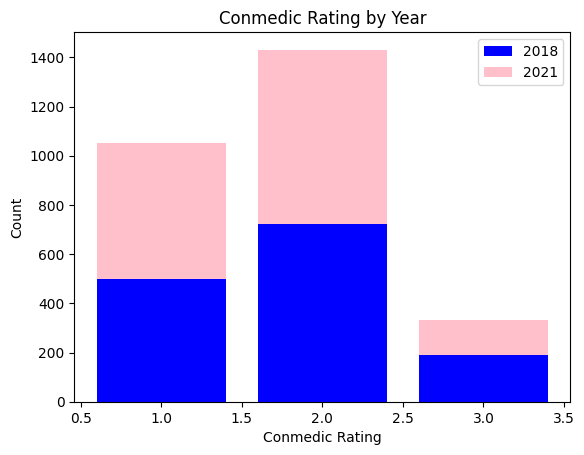

In [19]:
df_conmed_year = pd.crosstab(df['conmedic'], df['year'])

plt.bar(1.0, df_conmed_year.loc[1.0][2018], bottom=None, color='blue', label='2018')
plt.bar(1.0, df_conmed_year.loc[1.0][2021], bottom=df_conmed_year.loc[1.0][2018], color='pink', label='2021')

plt.bar(2.0, df_conmed_year.loc[2.0][2018], bottom=None, color='blue')
plt.bar(2.0, df_conmed_year.loc[2.0][2021], bottom=df_conmed_year.loc[2.0][2018], color='pink')

plt.bar(3.0, df_conmed_year.loc[3.0][2018], bottom=None, color='blue')
plt.bar(3.0, df_conmed_year.loc[3.0][2021], bottom=df_conmed_year.loc[3.0][2018], color='pink')

plt.legend()
plt.xlabel('Conmedic Rating')
plt.ylabel('Count')
plt.title("Conmedic Rating by Year")

Our stacked barchart of overall confidence in the medical system is reflective of our findings in the data analysis. There are slightly more people who rank 1 in 2021 (about 540) than 2018 (about 510). Additionally, there are slightly less people that rank 3 in 2021 (about 180) than in 2018 (about 210). This means there is a **slight increase in the number of people who have strong medical confidence and a slight decrease in the number of people who have hardly any medical confidence over time.**

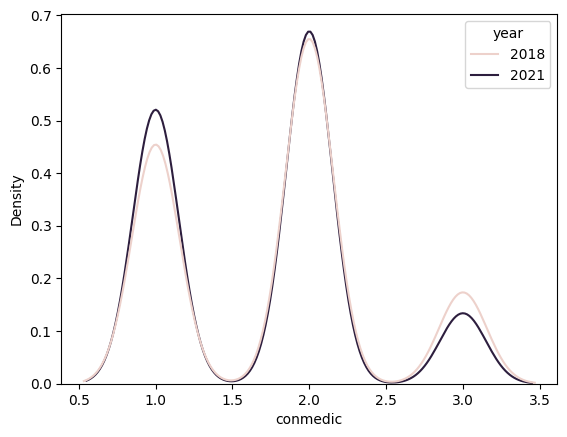

In [20]:
plot = sns.kdeplot(data=df, x='conmedic', hue='year', hue_order = [2018, 2021])

The kernel density plot is also a reflection of our previous findings.

Two differences of note occur at 1.0 and 3.0. There is a higher density of people who have a strong level of confidence in the American healthcare system in 2021 compared to 2018. Additionally, there is a lower density of people who have no confidence in the American healthcare system in 2021 compared to 2018. This confirms our findings in the data analysis that **confidence in healthcare slightly increased over time**.

#### Conmedic Differences Across Subgroups

In order to see if there were trends in the differences in medical confidence between subgroups, we broke the data down depending on age and political party.

##### Party Affiliation

In [21]:
# these values come from the codebook
party_names = ["STRONG DEMOCRAT",
               "NOT VERY STRONG DEMOCRAT",
               "INDEPENDENT, CLOSE TO DEMOCRAT",
               "INDEPENDENT (NEITHER, NO RESPONSE)",
               "INDEPENDENT, CLOSE TO REPUBLICAN",
               "NOT VERY STRONG REPUBLICAN",
               "STRONG REPUBLICAN",
               "OTHER PARTY"]

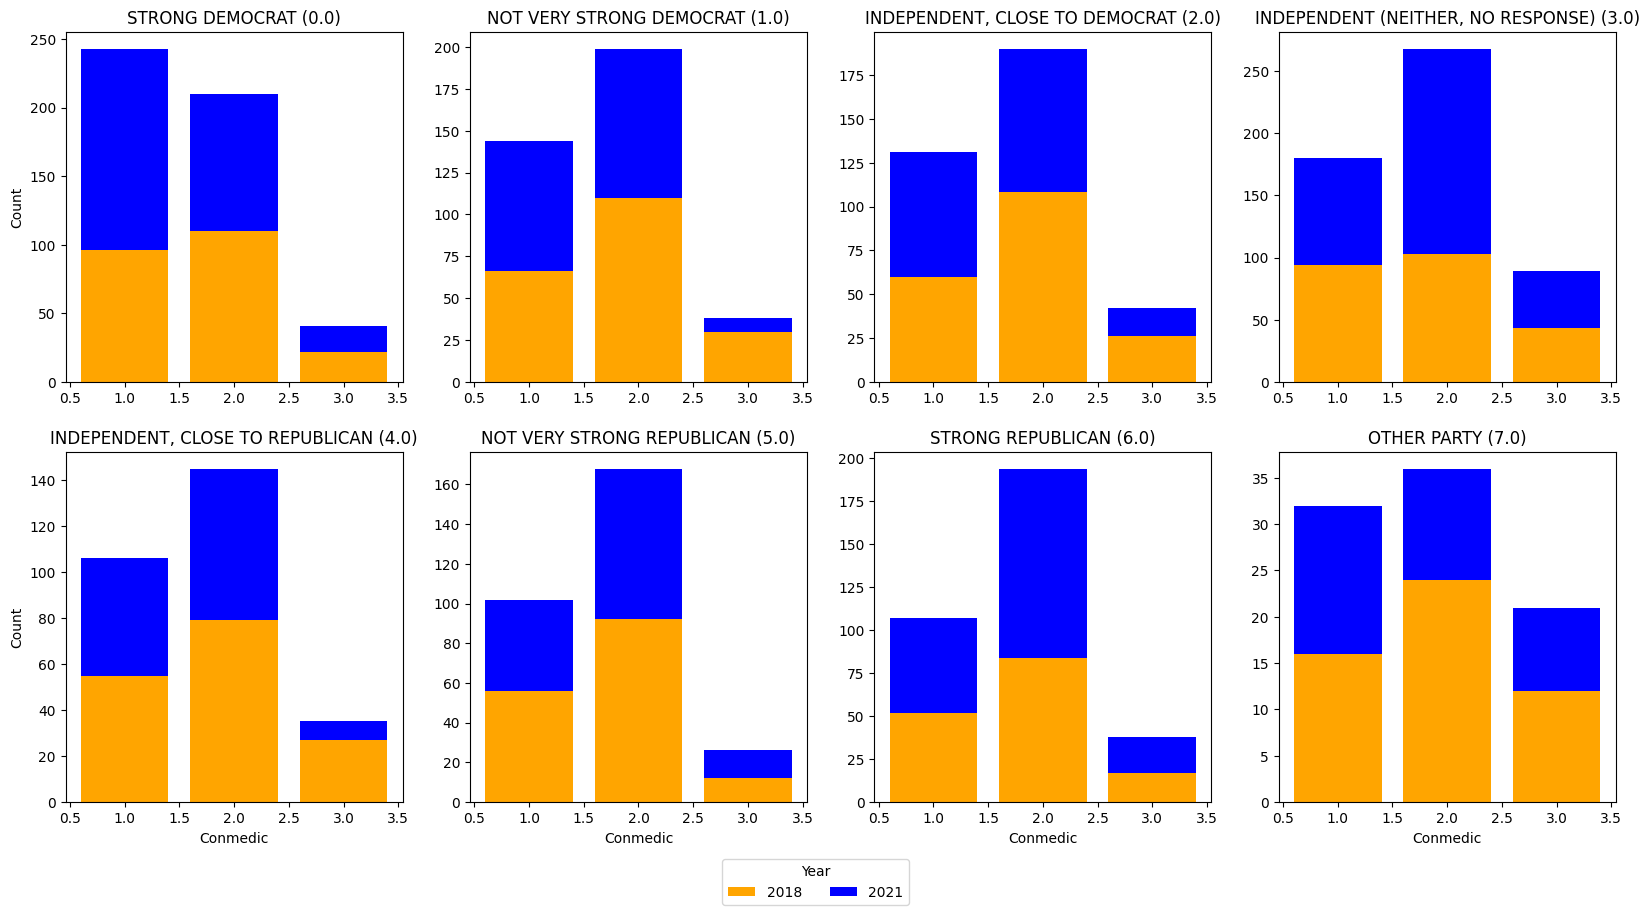

In [22]:
parties = sorted(df.partyid.dropna().unique())
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, party in enumerate(parties):
    row = i//4
    col = i%4

    party_name = party_names[int(party)]

    df_party_conmed_year = pd.crosstab(df[df['partyid']==party]['conmedic'], df[df['partyid']==party]['year'])

    axs[row][col].bar(1.0, df_party_conmed_year.loc[1.0][2018], bottom=None, color='orange', label='2018')
    axs[row][col].bar(1.0, df_party_conmed_year.loc[1.0][2021], bottom=df_party_conmed_year.loc[1.0][2018], color='blue', label='2021')

    axs[row][col].bar(2.0, df_party_conmed_year.loc[2.0][2018], bottom=None, color='orange')
    axs[row][col].bar(2.0, df_party_conmed_year.loc[2.0][2021], bottom=df_party_conmed_year.loc[2.0][2018], color='blue')

    axs[row][col].bar(3.0, df_party_conmed_year.loc[3.0][2018], bottom=None, color='orange')
    axs[row][col].bar(3.0, df_party_conmed_year.loc[3.0][2021], bottom=df_party_conmed_year.loc[3.0][2018], color='blue')

    axs[row][col].set_xlabel("")
    axs[row][col].set_ylabel("")
    axs[row][col].set_title(f"{party_name} ({party})")

    if row==1:
        axs[row][col].set_xlabel("Conmedic")
    if col==0:
        axs[row][col].set_ylabel("Count")

plt.figlegend([2018, 2021], title='Year', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)

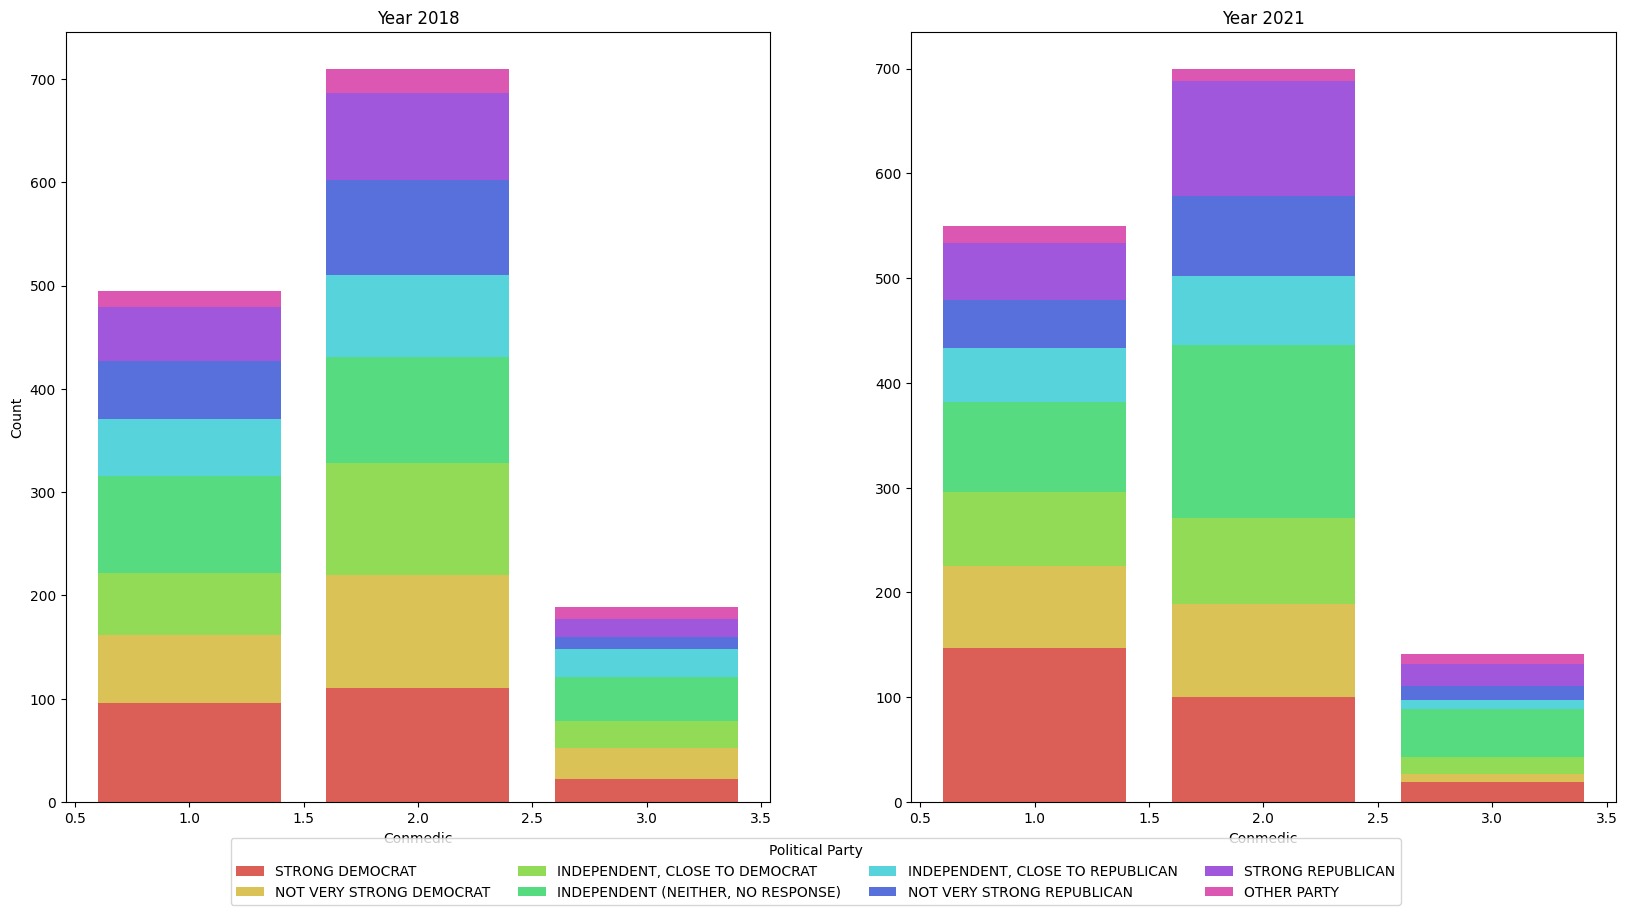

In [23]:
parties = sorted(df.partyid.dropna().unique())
fig, axs = plt.subplots(ncols = 2, figsize = (20, 10))
colors = sns.color_palette("hls", 8)

for i, year in enumerate([2018, 2021]):

    handles = []

    col = i
    df_party_conmed = pd.crosstab(df[df['year']==year]['conmedic'], df[df['year']==year]['partyid'])

    party_name = party_names[0]
    handles.append(axs[col].bar(1.0, df_party_conmed.loc[1.0][0.0], bottom=None, color=colors[0], label=party_name))
    axs[col].bar(2.0, df_party_conmed.loc[2.0][0.0], bottom=None, color=colors[0])
    axs[col].bar(3.0, df_party_conmed.loc[3.0][0.0], bottom=None, color=colors[0])

    prev_height_1 = df_party_conmed.loc[1.0][0.0]
    prev_height_2 = df_party_conmed.loc[2.0][0.0]
    prev_height_3 = df_party_conmed.loc[3.0][0.0]

    for j in range(1, len(parties)):

        party = parties[j]
        party_name = party_names[int(party)]

        handles.append(axs[col].bar(1.0, df_party_conmed.loc[1.0][party], bottom=prev_height_1, color=colors[j], label=party_name))
        axs[col].bar(2.0, df_party_conmed.loc[2.0][party], bottom=prev_height_2, color=colors[j])
        axs[col].bar(3.0, df_party_conmed.loc[3.0][party], bottom=prev_height_3, color=colors[j])

        prev_height_1 += df_party_conmed.loc[1.0][party]
        prev_height_2 += df_party_conmed.loc[2.0][party]
        prev_height_3 += df_party_conmed.loc[3.0][party]

        axs[col].set_xlabel("")
        axs[col].set_ylabel("")
        axs[col].set_title(f"Year {year}")

    axs[col].set_xlabel("Conmedic")
    if col==0:
        axs[col].set_ylabel("Count")

plt.figlegend(handles, party_names, title='Political Party', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4)

For all left leaning parties, the number of people who responded 1 slightly increased over time, ESPECIALLY strong Democrats. Responses to 2 and 3 remained about the same, except there was a significant drop in not very strong Democrats responding 3 over time. Not very strong Republicans appeared to have a slight decrease in 1 respondents, although strong Republicans had a slight increase in 1 respondents. Right leaning independents had a large drop in 3 respondents.

Overall, Democrats appear to have slightly more strong confidence responses over time, especially strongly affiliated Democrats. Republicans’ confidence levels seemed to remain about the same. This means that **Democrats slightly increased their confidence in the medical system over time while Republicans remained about the same**.

We decided to plot the data with a density plot as well.

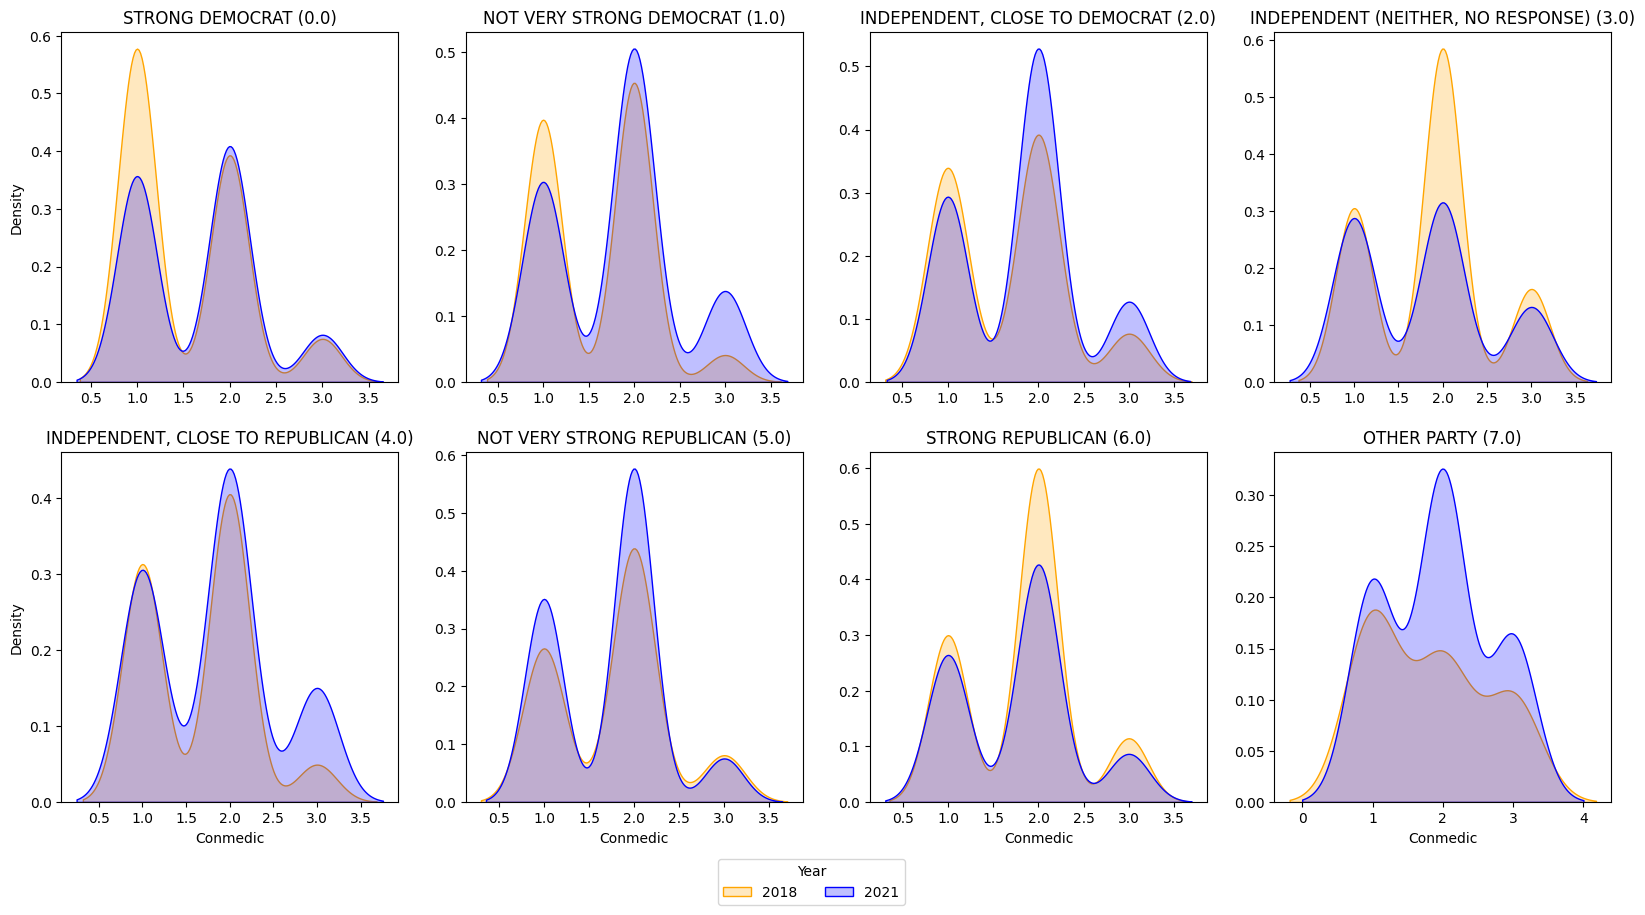

In [24]:
parties = sorted(df.partyid.dropna().unique())
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, party in enumerate(parties):
    row = i//4
    col = i%4

    party_name = party_names[int(party)]

    plot = sns.kdeplot(data=df[df['partyid']==party], x='conmedic', hue='year', hue_order = [2018, 2021], palette=['blue', 'orange'], ax = axs[row][col], fill = True, legend=False)

    axs[row][col].set_xlabel("")
    axs[row][col].set_ylabel("")
    axs[row][col].set_title(f"{party_name} ({party})")

    if row==1:
        axs[row][col].set_xlabel("Conmedic")
    if col==0:
        axs[row][col].set_ylabel("Density")

plt.figlegend([2018, 2021], title='Year', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)

Although the density plot is not a great representation of the data because of the categorical nature of the measured variable, it shows similar findings to our previous graph.

##### Age

Text(0, 0.5, 'Age')

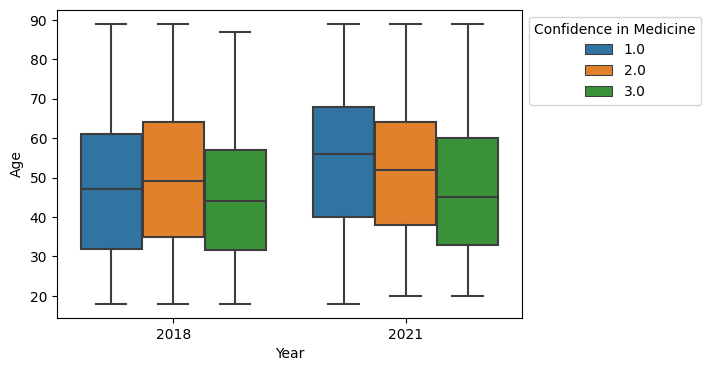

In [25]:
fig = plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x='year', y='age', hue='conmedic')
plt.legend(loc='upper left', title="Confidence in Medicine", bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Age")

After the pandemic, a pattern emerges. Before the pandemic, the mean age was highest amongst the group with some confidence. After the pandemic, the mean age was highest in the group with the most confidence. Additionally, the IQR for age of individuals with high levels of trust in medical institutions increased over time. This suggests that **older people had more faith in medical systems after the pandemic** compared to younger age groups.

Let's examine the amount of younger vs older respondants over time in a histogram.

<Axes: xlabel='age', ylabel='Count'>

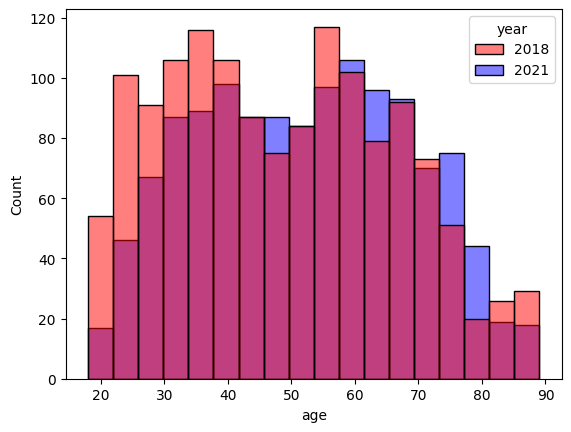

In [26]:
sns.histplot(data = df, x='age', hue='year', palette=['red', 'blue'])

This shows that more young people responded in 2018 and more older people responded in 2021. If older people are more likely to have high confidence rates, this could indicate why the overall confidence level increased from 2018 to 2021.

Let's examine if confidence in healthcare systems changed over time within different age groups

In [27]:
def calculate_age_group(original_value):
  if original_value < 24:
    return "18-24"
  if original_value < 35:
    return "25-34"
  if original_value < 45:
    return "35-44"
  if original_value < 55:
    return "45-54"
  if original_value < 65:
    return "55-64"

  return "65+"

df['age_group'] = df['age'].apply(calculate_age_group)

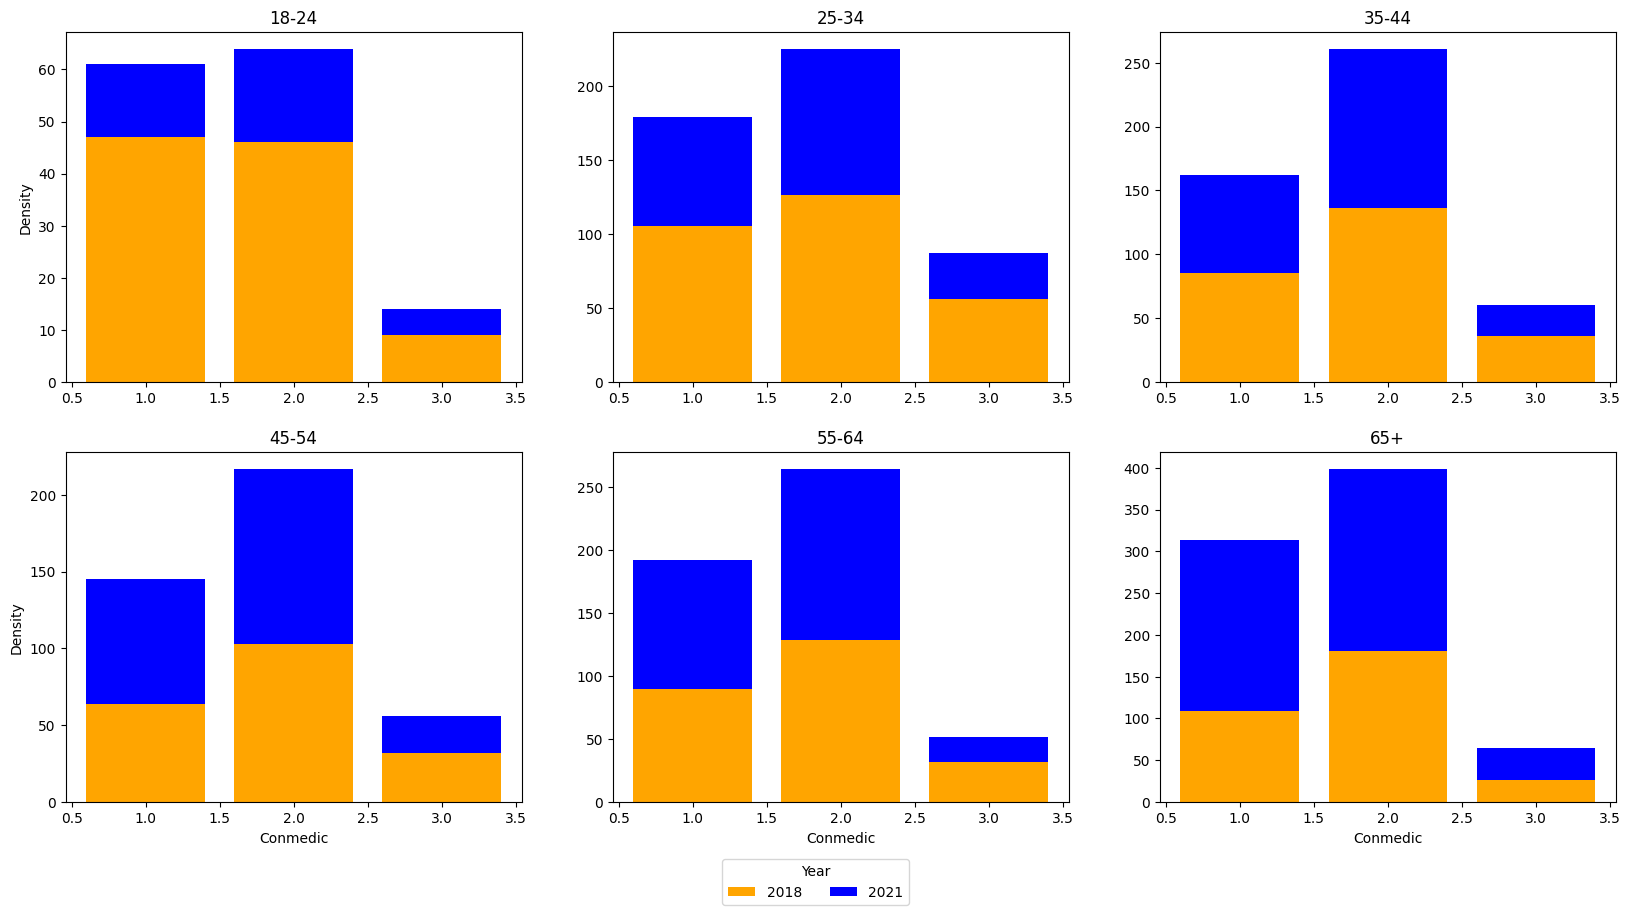

In [28]:
age_groups = sorted(df.age_group.dropna().unique())
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))

for i, group in enumerate(age_groups):
    row = i//3
    col = i%3

    df_age_conmed_year = pd.crosstab(df[df['age_group']==group]['conmedic'], df[df['age_group']==group]['year'])

    axs[row][col].bar(1.0, df_age_conmed_year.loc[1.0][2018], bottom=None, color='orange', label='2018')
    axs[row][col].bar(1.0, df_age_conmed_year.loc[1.0][2021], bottom=df_age_conmed_year.loc[1.0][2018], color='blue', label='2021')

    axs[row][col].bar(2.0, df_age_conmed_year.loc[2.0][2018], bottom=None, color='orange')
    axs[row][col].bar(2.0, df_age_conmed_year.loc[2.0][2021], bottom=df_age_conmed_year.loc[2.0][2018], color='blue')

    axs[row][col].bar(3.0, df_age_conmed_year.loc[3.0][2018], bottom=None, color='orange')
    axs[row][col].bar(3.0, df_age_conmed_year.loc[3.0][2021], bottom=df_age_conmed_year.loc[3.0][2018], color='blue')

    axs[row][col].set_xlabel("")
    axs[row][col].set_ylabel("")
    axs[row][col].set_title(f"{group}")

    if row==1:
        axs[row][col].set_xlabel("Conmedic")
    if col==0:
        axs[row][col].set_ylabel("Density")

plt.figlegend([2018, 2021], title='Year', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)

age_group  18-24  25-34  35-44  45-54  55-64  65+
conmedic                                         
1.0           47    105     85     64     90  109
2.0           46    126    136    103    129  181
3.0            9     56     36     32     32   26
age_group  18-24  25-34  35-44  45-54  55-64  65+
conmedic                                         
1.0           14     74     77     81    102  204
2.0           18     99    125    114    136  218
3.0            5     31     24     24     20   38


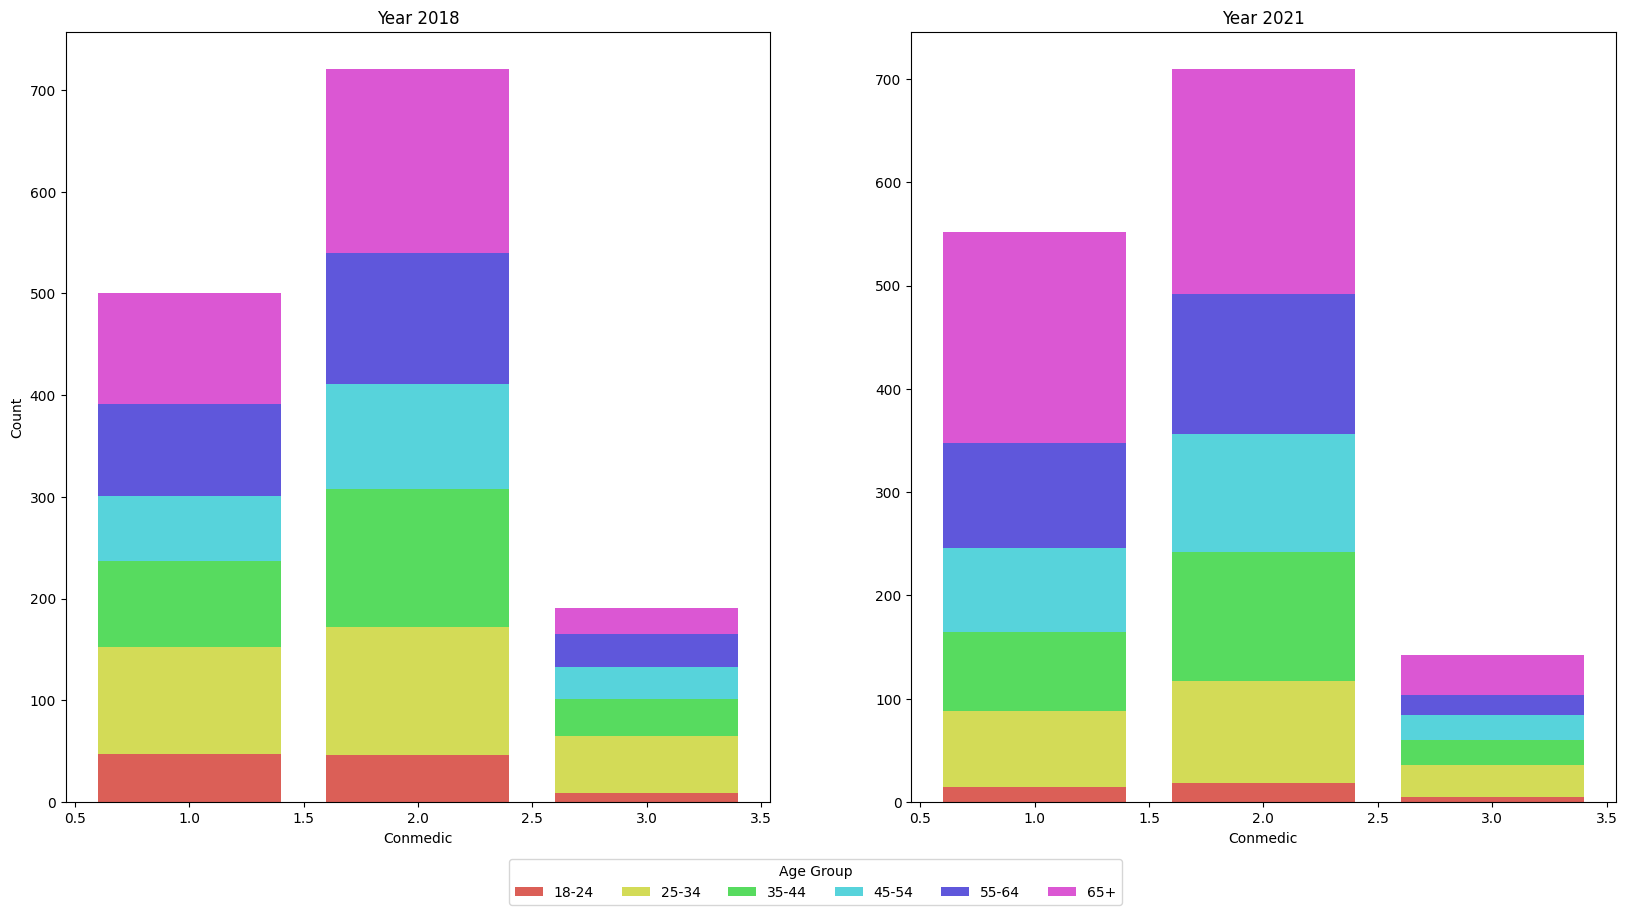

In [29]:
age_groups = sorted(df.age_group.dropna().unique())
fig, axs = plt.subplots(ncols = 2, figsize = (20, 10))
colors = sns.color_palette("hls", 6)

for i, year in enumerate([2018, 2021]):

    handles = []

    col = i
    df_age_conmed = pd.crosstab(df[df['year']==year]['conmedic'], df[df['year']==year]['age_group'])
    print(df_age_conmed)

    age_group = age_groups[0]
    handles.append(axs[col].bar(1.0, df_age_conmed.loc[1.0][age_group], bottom=None, color=colors[0], label=age_group))
    axs[col].bar(2.0, df_age_conmed.loc[2.0][age_group], bottom=None, color=colors[0])
    axs[col].bar(3.0, df_age_conmed.loc[3.0][age_group], bottom=None, color=colors[0])

    prev_height_1 = df_age_conmed.loc[1.0][age_group]
    prev_height_2 = df_age_conmed.loc[2.0][age_group]
    prev_height_3 = df_age_conmed.loc[3.0][age_group]

    for j in range(1, len(age_groups)):

        age_group = age_groups[j]

        handles.append(axs[col].bar(1.0, df_age_conmed.loc[1.0][age_group], bottom=prev_height_1, color=colors[j], label=age_group))
        axs[col].bar(2.0, df_age_conmed.loc[2.0][age_group], bottom=prev_height_2, color=colors[j])
        axs[col].bar(3.0, df_age_conmed.loc[3.0][age_group], bottom=prev_height_3, color=colors[j])

        prev_height_1 += df_age_conmed.loc[1.0][age_group]
        prev_height_2 += df_age_conmed.loc[2.0][age_group]
        prev_height_3 += df_age_conmed.loc[3.0][age_group]

        axs[col].set_xlabel("")
        axs[col].set_ylabel("")
        axs[col].set_title(f"Year {year}")

    axs[col].set_xlabel("Conmedic")
    if col==0:
        axs[col].set_ylabel("Count")

plt.figlegend(handles, age_groups, title='Age Group', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=6)

18-34 year olds seem to have a lot less respondents for 1. 35-44 year olds remained roughly the same, with a few less responding 3. 45-55 year olds have slightly more respondents for 1, and 65+ have a significant increase in 1 respondents. From these graphs, it can be deduced that **18-24 year olds had a decrease in their confidence** in the medical system while people **aged 65+ increased their confidence** after COVID-19.

We decided to plot age with a density plot as well.

KD plots

In [30]:
def calculate_age_group(original_value):
  if original_value < 24:
    return "18-24"
  if original_value < 35:
    return "25-34"
  if original_value < 45:
    return "35-44"
  if original_value < 55:
    return "45-54"
  if original_value < 65:
    return "55-64"

  return "65+"

df['age_group'] = df['age'].apply(calculate_age_group)

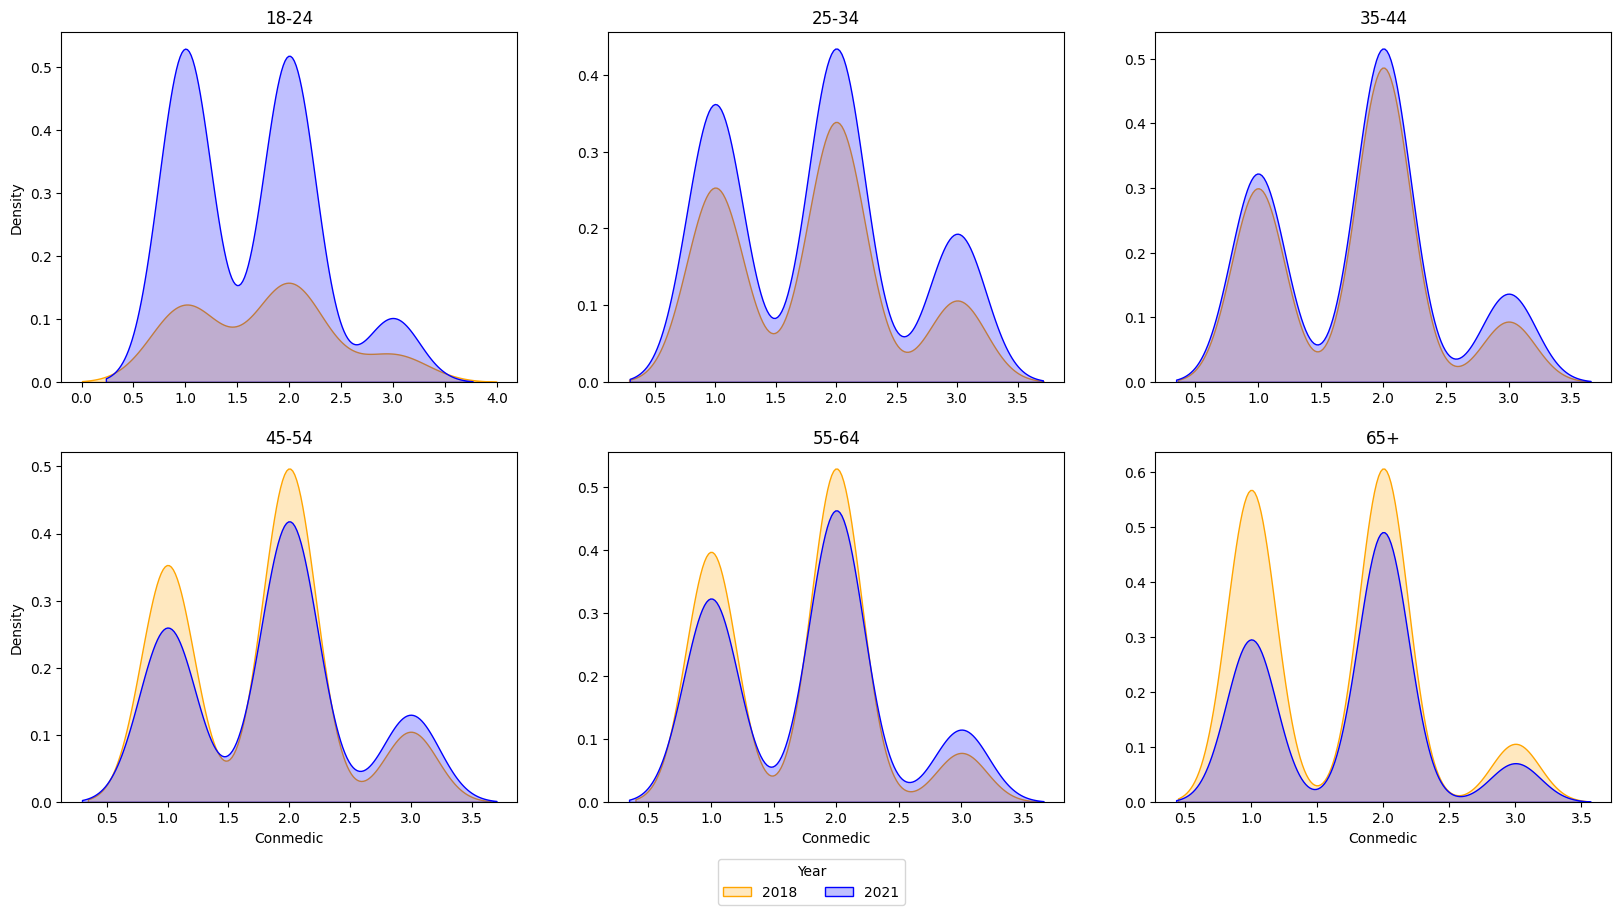

In [31]:
age_groups = sorted(df.age_group.dropna().unique())
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))

for i, group in enumerate(age_groups):
    row = i//3
    col = i%3

    plot = sns.kdeplot(data=df[df['age_group']==group], x='conmedic', hue='year', hue_order = [2018, 2021], palette=['blue', 'orange'], ax = axs[row][col], fill = True, legend=False)

    axs[row][col].set_xlabel("")
    axs[row][col].set_ylabel("")
    axs[row][col].set_title(f"{group}")

    if row==1:
        axs[row][col].set_xlabel("Conmedic")
    if col==0:
        axs[row][col].set_ylabel("Density")

plt.figlegend([2018, 2021], title='Year', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)

Although this not the most telling graph due to the nature of the variables, the shift in perceptions according to age groups is apparent. The increase in the amount of younger people who responded 3 is more than the increase in the amount of older people who responded 3 over time. This emphasizes the idea that younger people tend to have less confidence over time.

Let's look at the difference of mean and standard deviation of age groups' confidence levels over time.

In [32]:
age_group_stats = df.loc[:,['conmedic', 'year', 'age_group']].groupby(['year', 'age_group']).describe()


In [33]:
age_group_stats.shape

(12, 8)

In [34]:
age_group_stats

conmedic                                             
                  count      mean       std  min  25%  50%  75%  max
year age_group                                                      
2018 18-24        102.0  1.627451  0.643652  1.0  1.0  2.0  2.0  3.0
     25-34        287.0  1.829268  0.730538  1.0  1.0  2.0  2.0  3.0
     35-44        257.0  1.809339  0.660426  1.0  1.0  2.0  2.0  3.0
     45-54        199.0  1.839196  0.677392  1.0  1.0  2.0  2.0  3.0
     55-64        251.0  1.768924  0.659083  1.0  1.0  2.0  2.0  3.0
     65+          316.0  1.737342  0.599469  1.0  1.0  2.0  2.0  3.0
2021 18-24         37.0  1.756757  0.683350  1.0  1.0  2.0  2.0  3.0
     25-34        204.0  1.789216  0.687454  1.0  1.0  2.0  2.0  3.0
     35-44        226.0  1.765487  0.627414  1.0  1.0  2.0  2.0  3.0
     45-54        219.0  1.739726  0.643116  1.0  1.0  2.0  2.0  3.0
     55-64        258.0  1.682171  0.610982  1.0  1.0  2.0  2.0  3.0
     65+          460.0  1.639130  0.629859  1.0  1.0  2.0  2.0  3.0

In [35]:
mean_info = age_group_stats[('conmedic', 'mean')]
mean_info

year  age_group
2018  18-24        1.627451
      25-34        1.829268
      35-44        1.809339
      45-54        1.839196
      55-64        1.768924
      65+          1.737342
2021  18-24        1.756757
      25-34        1.789216
      35-44        1.765487
      45-54        1.739726
      55-64        1.682171
      65+          1.639130
Name: (conmedic, mean), dtype: float64

In [36]:
age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
means_2021 = [mean_info[2021][i] for i in range(len(mean_info[2021]))]
means_2018 = [mean_info[2018][i] for i in range(len(mean_info[2018]))]

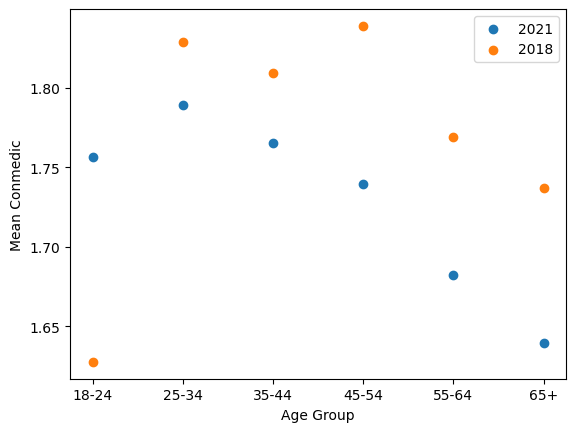

In [37]:
plt.scatter(age_groups, means_2021, label = "2021")
plt.scatter(age_groups, means_2018, label = "2018")
plt.xlabel('Age Group')
plt.ylabel('Mean Conmedic')
plt.legend()
plt.show()

This suggests that people aged 18-24 had less confidence in the medical system over time. Ages 25+ had more confidence in the medical system, especially those older than 45.